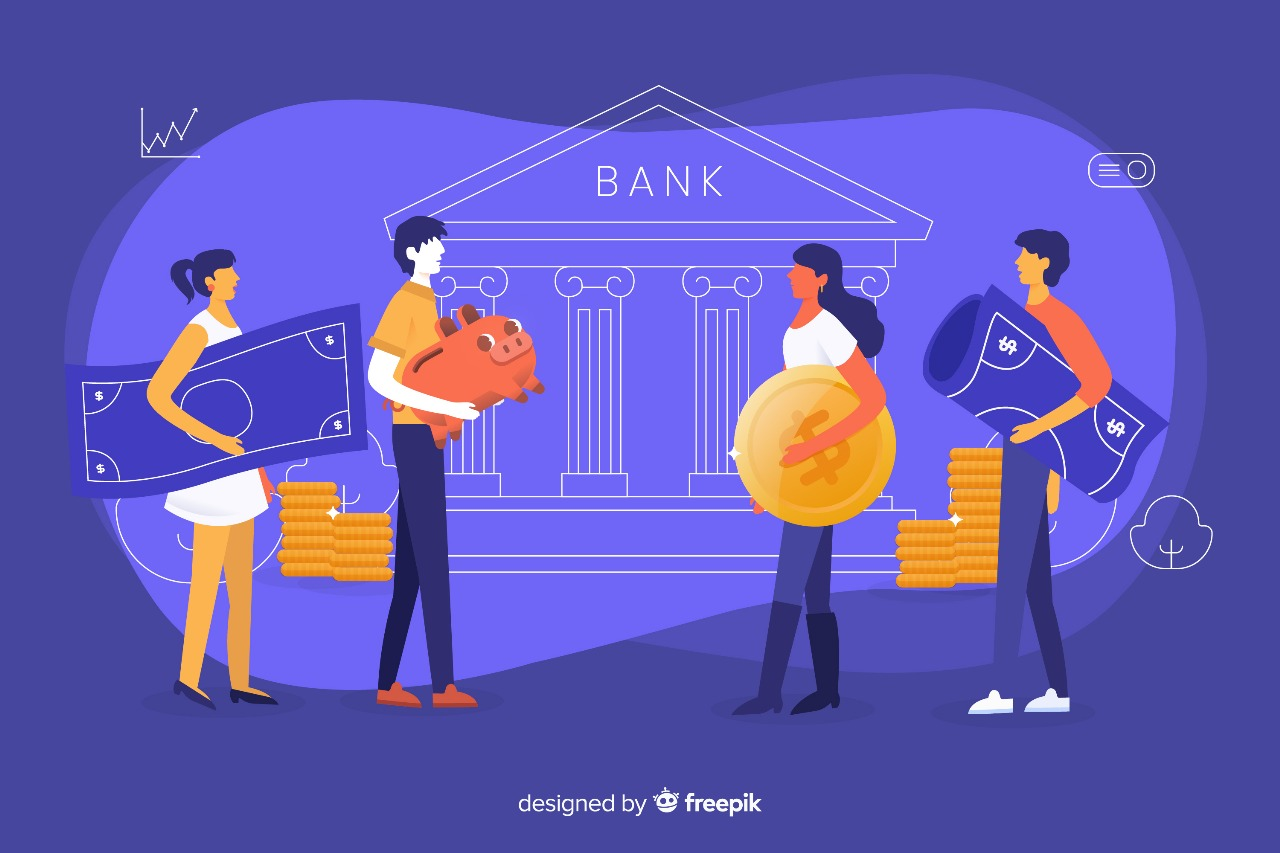

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.20.0


In [3]:
#import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#read dataset
dataset = pd.read_csv('bankchurn_train.csv')

dataset.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
dataset.shape

(165034, 14)

In [6]:
#divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [8]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

In [9]:
#feature engineer
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
#dropping geography and gender feature
X = X.drop(['Geography', 'Gender'], axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,33.0,5,0.00,2,1.0,1.0,15068.83


In [12]:
#concating the categorical features with dataframe X
X=pd.concat([X,geography,gender],axis=1)

In [13]:
#splitting the dataset into trainset and test set
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [15]:
X_train

array([[-2.05077043, -0.69372353,  1.77629554, ..., -0.51598407,
        -0.53086301,  0.87946572],
       [ 0.49254297, -0.69372353, -1.78867859, ..., -0.51598407,
        -0.53086301, -1.13705398],
       [-0.05601482,  0.54588018,  1.77629554, ..., -0.51598407,
         1.88372515,  0.87946572],
       ...,
       [-1.00352373, -0.80641478,  0.35030589, ..., -0.51598407,
         1.88372515,  0.87946572],
       [ 1.17824021, -1.25717976, -0.36268894, ..., -0.51598407,
        -0.53086301, -1.13705398],
       [ 0.76682186,  0.20780644, -1.43218118, ...,  1.93804434,
        -0.53086301, -1.13705398]])

In [16]:
X_train.shape

(132027, 11)

In [17]:
 #part2 #create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU, ReLU

In [18]:
#Lets initialize the ANN
classifier=Sequential()

In [19]:
#adding the input layers
classifier.add(Dense(units=11,activation='relu'))


In [20]:
#add the first hidden layer
classifier.add(Dense(units=7,activation='relu'))


In [21]:
#add the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [22]:
#add the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [23]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#earlystopping 
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [25]:
#lets train the model
model_history=classifier.fit(X_train,Y_train,validation_split=0.33, batch_size=10, epochs=50,callbacks=early_stopping)

Epoch 1/50
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8464 - loss: 0.3575 - val_accuracy: 0.8641 - val_loss: 0.3288
Epoch 2/50
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.8590 - loss: 0.3336 - val_accuracy: 0.8651 - val_loss: 0.3252
Epoch 3/50
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8608 - loss: 0.3305 - val_accuracy: 0.8653 - val_loss: 0.3256
Epoch 4/50
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.8604 - loss: 0.3291 - val_accuracy: 0.8652 - val_loss: 0.3237
Epoch 5/50
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.8612 - loss: 0.3286 - val_accuracy: 0.8662 - val_loss: 0.3231
Epoch 6/50
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.8615 - loss: 0.3281 - val_accuracy: 0.8641 - val_loss: 0.3246
Epoch 7/50
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.8619 - loss: 0.3278 - val_accuracy: 0.8655 - val_loss: 0.3233
Epoch 8/50
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.8625 - loss: 0

In [26]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

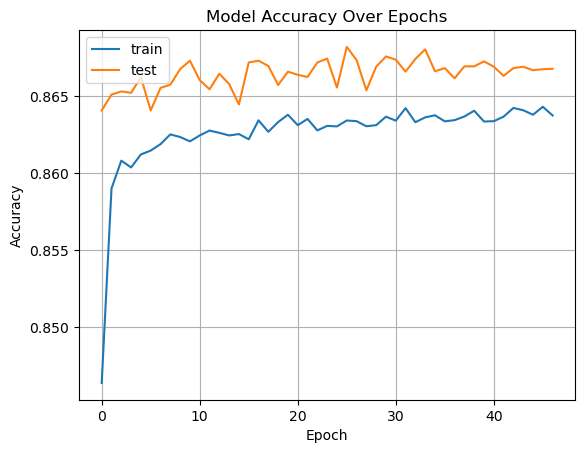

In [29]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid(True)
plt.show()

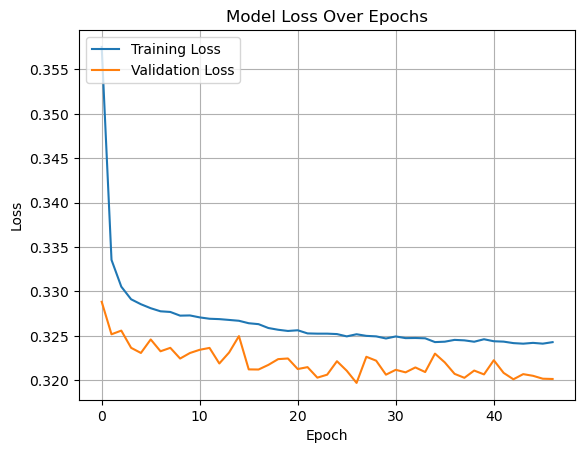

In [30]:
#summarize history for loss
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [31]:
#part 3, making the prediction and evaluating the model


#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)


1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [32]:
#Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test,y_pred)
cm

array([[24720,  1368],
       [ 3133,  3786]])

In [33]:
##calculate the accuracy 
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred,Y_test)

In [34]:
score

0.8636349865180113